In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data=pd.read_csv("/Admission_Predict.csv")
print(data.columns,data.shape)
data

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object') (400, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [26]:
print(data.corr(),data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB
                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Ra

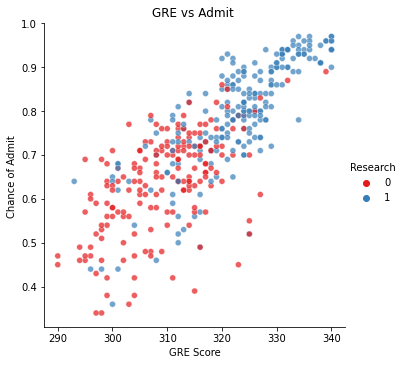

In [40]:
sns.relplot(data=data,x="GRE Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7)
plt.title("GRE vs Admit ")
plt.show()

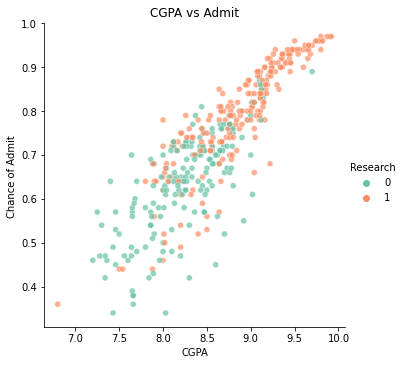

In [41]:
sns.relplot(data=data,x="CGPA",y="Chance of Admit ",hue="Research",
            palette="Set2",alpha=0.7)
plt.title("CGPA vs Admit")
plt.show()

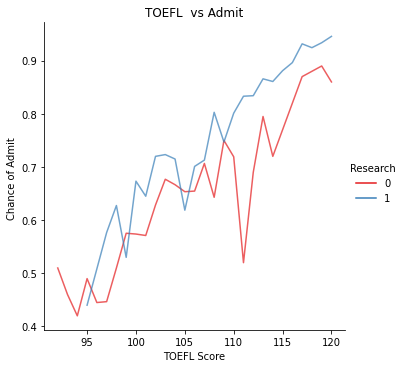

In [43]:
sns.relplot(data=data,x="TOEFL Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7,kind="line",ci=None)
plt.title("TOEFL  vs Admit")
plt.show()

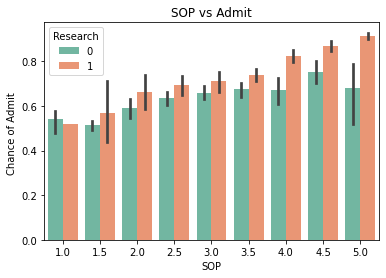

In [44]:
sns.barplot(data=data,x="SOP",y="Chance of Admit ",
            palette="Set2",hue="Research")
plt.title("SOP vs Admit")
plt.show()

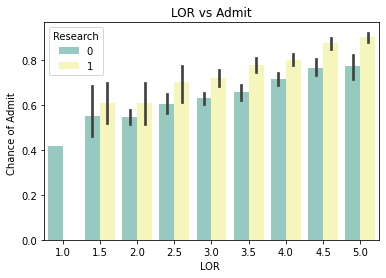

In [45]:
sns.barplot(data=data,x="LOR ",y="Chance of Admit ",
            palette="Set3",hue="Research")
plt.title("LOR vs Admit")
plt.show()

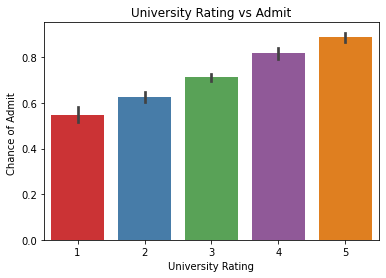

In [46]:
sns.barplot(data=data,x="University Rating",y="Chance of Admit ",
            palette="Set1")
plt.title("University Rating vs Admit")
plt.show()

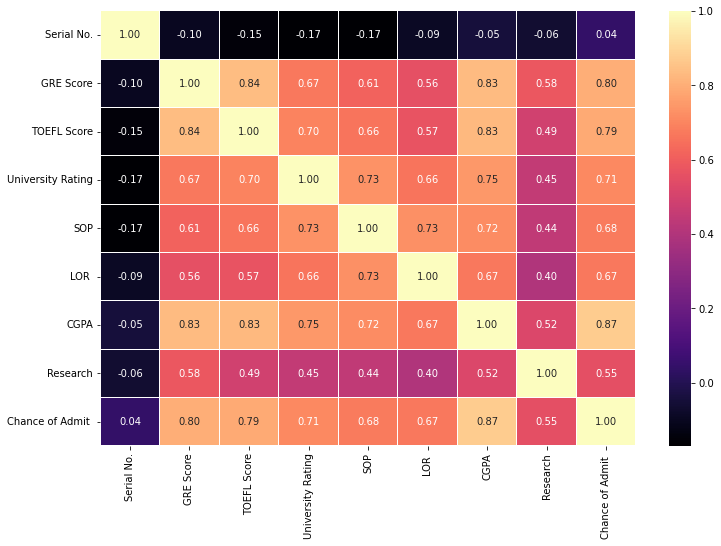

In [47]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

DATA

In [49]:
x=data.drop(['Serial No.','Chance of Admit '],axis=1)
y=data['Chance of Admit ']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 7)
(80, 7)
(320,)
(80,)


In [51]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train[x_train.columns]=mms.fit_transform(x_train[x_train.columns].values)
x_test[x_test.columns]=mms.transform(x_test[x_test.columns].values)

Using Randomforest regression

In [53]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

Evaluating

In [54]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,roc_auc_score,recall_score
print('model score:',model.score(x_test,y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('roc score:',roc_auc_score(y_test>0.5, y_pred>0.5))
print('recall score:',recall_score(y_test>0.5, y_pred>0.5))

model score: 0.7804679307559718
Mean Absolute Error: 0.050651249999999905
Mean Squared Error: 0.004905221124999986
Root Mean Squared Error: 0.0700372838208335
roc score: 0.6928571428571428
recall score: 0.9857142857142858


Saving the model

In [55]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

# New Section

Importing from drive Admission_Predict.csv

In [60]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored